In [ ]:
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

In [ ]:
image_org = Image.open("/content/monalisa.png")

In [ ]:
def rgb2gray(rgb):
    if(len(rgb.shape) == 3):
        return np.uint8(np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]))
    else:
        return rgb

In [ ]:
image = np.array(image_org)

In [ ]:
grayscale_image = rgb2gray(image)

In [ ]:
def calculate_median(array):
    sorted_array = np.sort(array)
    median = sorted_array[len(array)//2]
    return median

In [ ]:
def level_A(z_min, z_med, z_max, z_xy, S_xy, S_max):
    if(z_min < z_med < z_max):
        return level_B(z_min, z_med, z_max, z_xy, S_xy, S_max)
    else:
        S_xy += 2
        if(S_xy <= S_max):
            return level_A(z_min, z_med, z_max, z_xy, S_xy, S_max)
        else:
            return z_med

In [ ]:
def level_B(z_min, z_med, z_max, z_xy, S_xy, S_max):
    if(z_min < z_xy < z_max):
        return z_xy
    else:
        return z_med

In [ ]:
def amf(image, initial_window, max_window):
    xlength, ylength = image.shape
    
    z_min, z_med, z_max, z_xy = 0, 0, 0, 0
    S_max = max_window
    S_xy = initial_window
    
    output_image = image.copy()
    
    for row in range(S_xy, xlength-S_xy-1):
        for col in range(S_xy, ylength-S_xy-1):
            filter_window = image[row - S_xy : row + S_xy + 1, col - S_xy : col + S_xy + 1]
            target = filter_window.reshape(-1)
            z_min = np.min(target)
            z_max = np.max(target)
            z_med = calculate_median(target)
            z_xy = image[row, col] 
            
            new_intensity = level_A(z_min, z_med, z_max, z_xy, S_xy, S_max)
            output_image[row, col] = new_intensity
    return output_image

In [ ]:
output = Image.fromarray(amf(grayscale_image, 3, 11))
native_output = image_org.filter(ImageFilter.MedianFilter(size = 3))
original = Image.fromarray(grayscale_image)

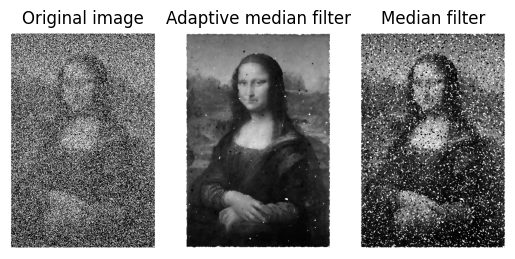

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3)
images = [[original, "Original image"], [output, "Adaptive median filter"], [native_output, "Median filter"]]
for i, ax in enumerate(axes):
    ax.imshow(images[i][0], cmap="gray")
    ax.set_title(images[i][1])
    ax.axis('off')
plt.show()